In [1]:
from dbn import DBN, MNIST_DBN
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
np.seterr(all='raise')
plt.close('all')

v = 28 * 28
layers = [500, 28 * 28]
lr = 0.01
epochs = 100
k = 3

mnist_dbn = MNIST_DBN(v, layers, gibbs_step=k)
mnist_dbn.train(n_epoch=epochs, learning=lr)

<h2>Random Sampling</h2>

In [4]:
def plot_images(images, cols=3, cmap='gray'):
    rows = (len(images) + cols - 1) // cols
    fig, ax = plt.subplots(rows, cols)
    for i, image in enumerate(images):
        ax[i//cols][i%cols].imshow(image, cmap=cmap)
        ax[i//cols][i%cols].get_xaxis().set_ticks([])
        ax[i//cols][i%cols].get_yaxis().set_ticks([])
    for i in range(len(images), rows*cols):
        ax[i//cols][i%cols].get_xaxis().set_ticks([])
        ax[i//cols][i%cols].get_yaxis().set_ticks([])
        ax[i//cols][i%cols].axis('off')
    fig.set_size_inches(cols*10, rows*10)
    #plt.savefig('plot/rbm_rand.png')
    plt.show()

In [5]:
mnist_dbn.dbn.rbms[0].k = 1
mnist_dbn.dbn.rbms[1].k = 1000

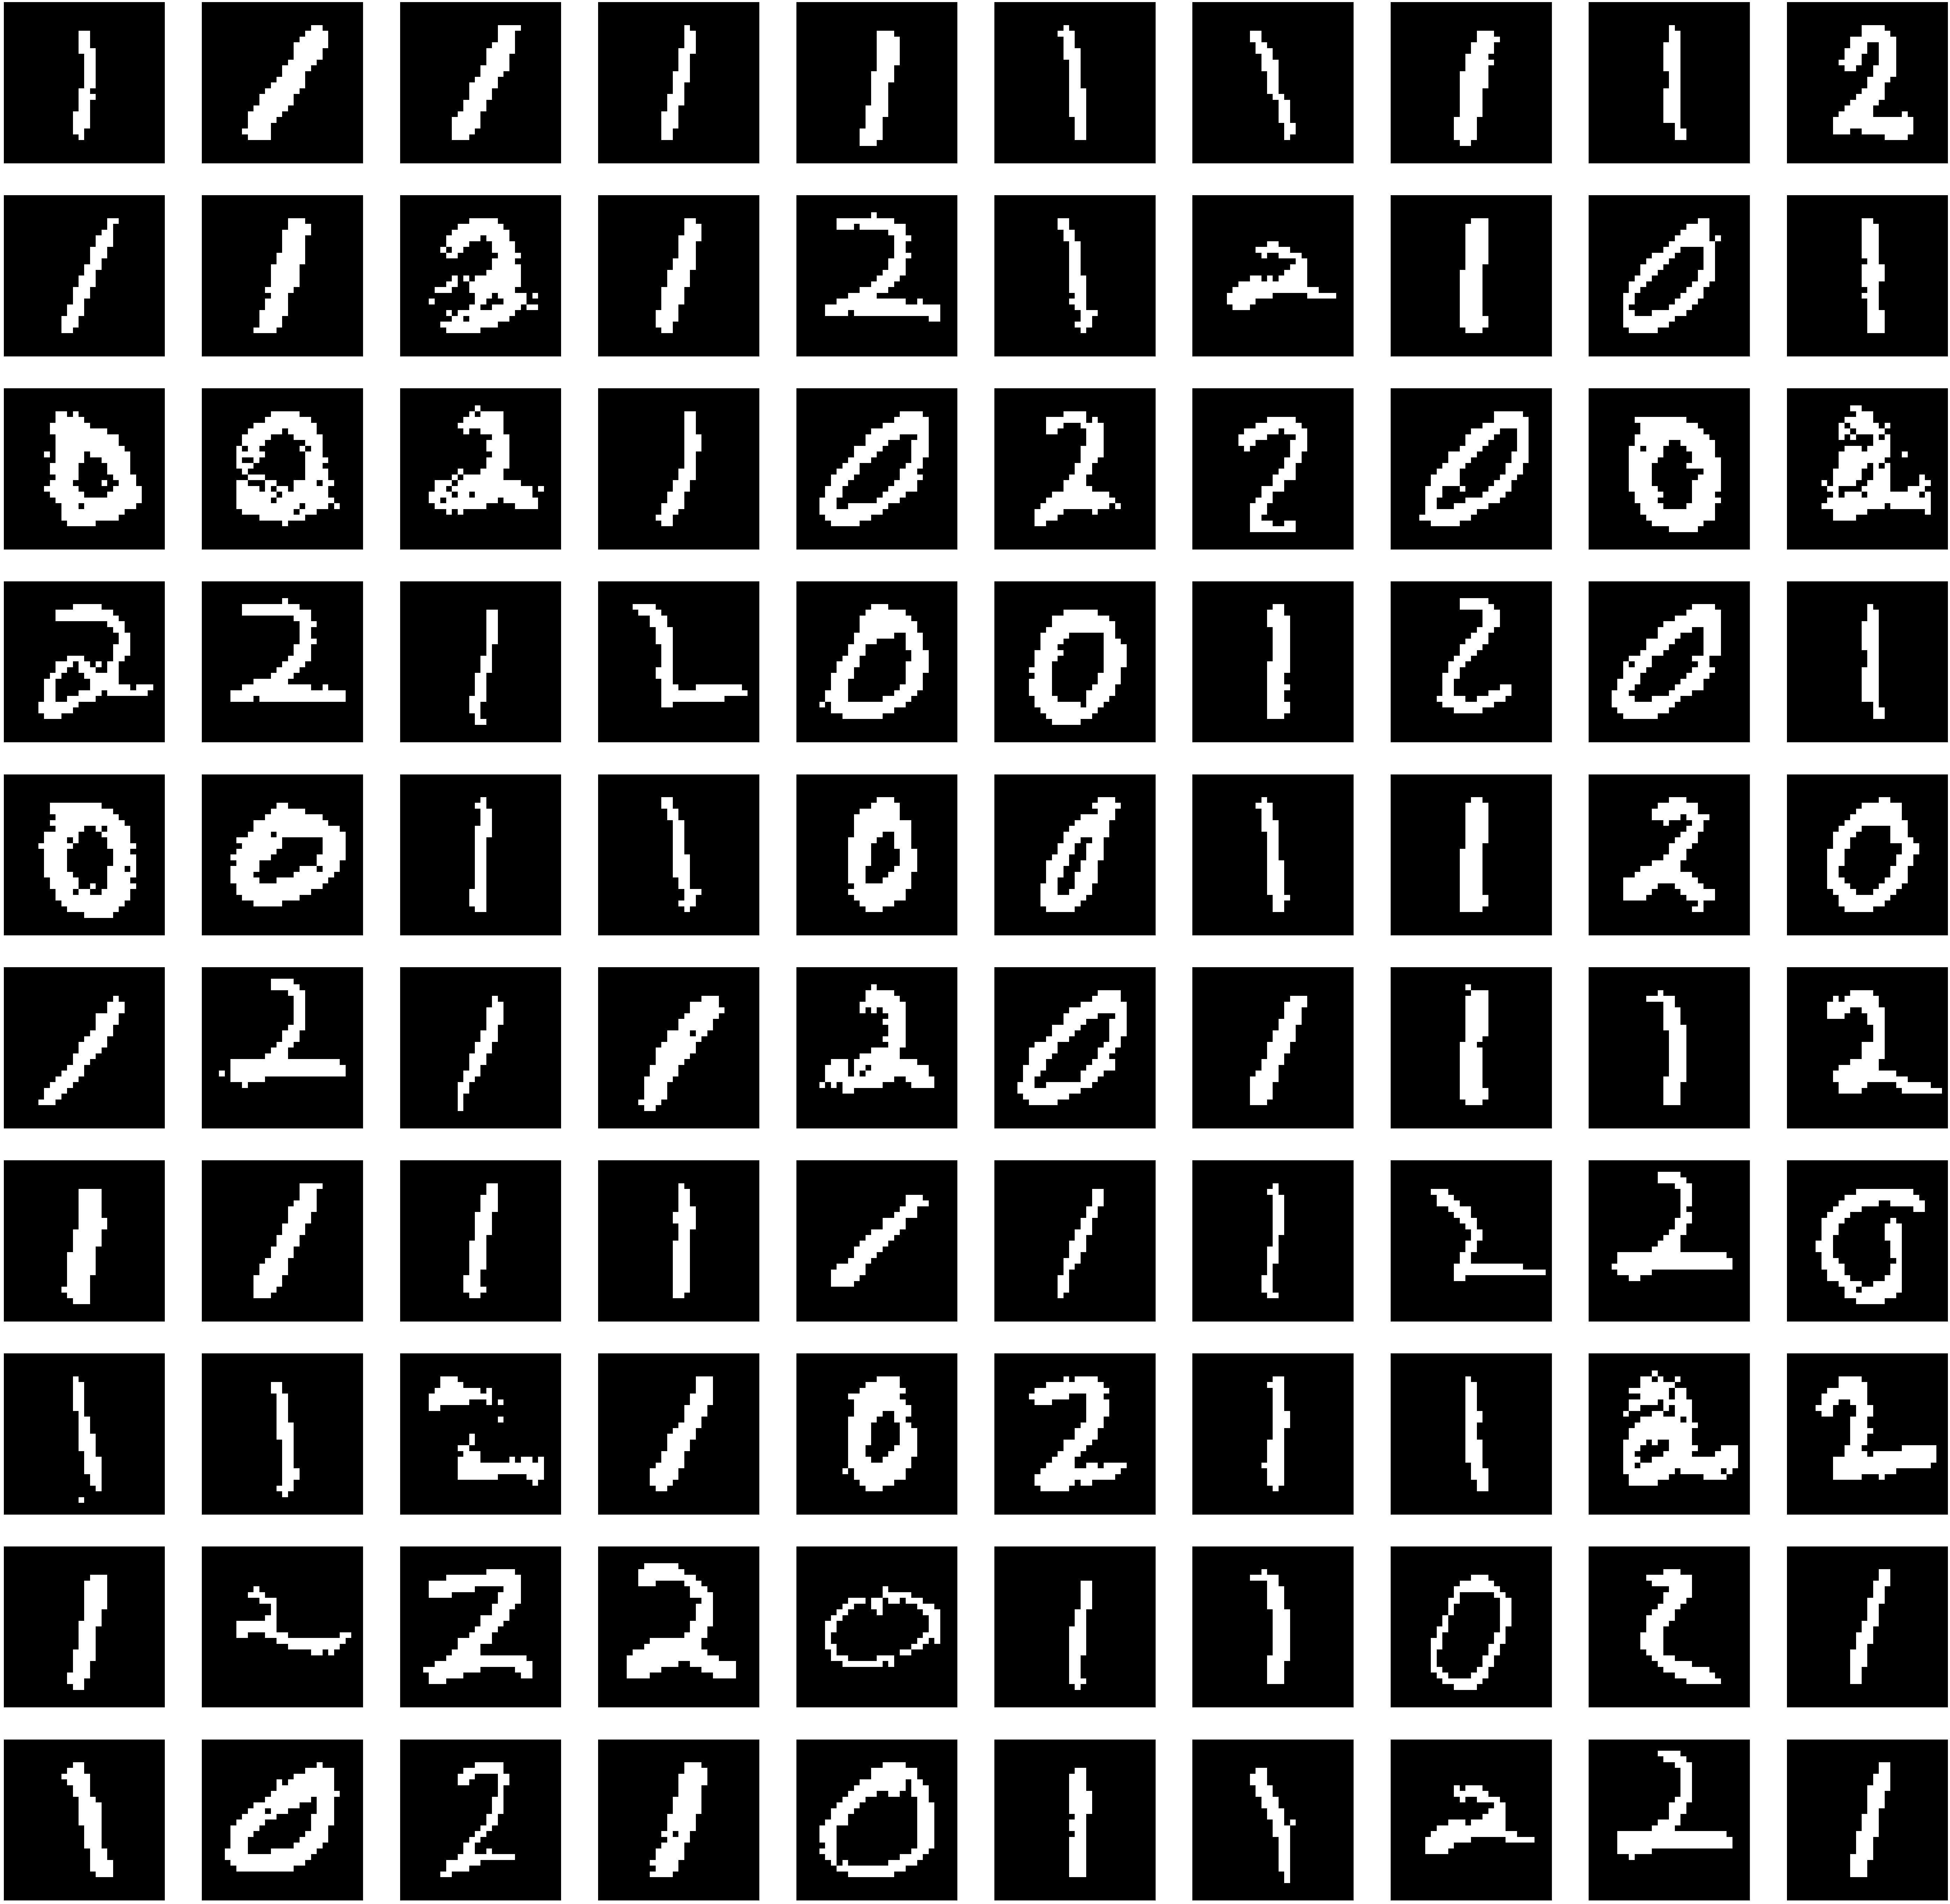

In [6]:
ims = []
for i in range(100):
    np.random.seed()
    v2 = np.random.binomial(1, .1, (1, 500))
    _, _, hs, vs, hp, vp = mnist_dbn.dbn.rbms[1].gibbs_k(v2)
    v1, _ = mnist_dbn.dbn.rbms[0].sample_v(vs)
    ims.append(v1.reshape((28, 28)))
ims = np.array(ims)

plot_images(ims, 10)

<h2>Plot</h2>

In [3]:
plt.plot(mnist_dbn.dbn.te_list[0], label='train')
plt.plot(mnist_dbn.dbn.ve_list[0], label='valid')
plt.title('DBN, k=3, RBM 1')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('reconstruction error')
print(f"RBM 1 train: {np.min(mnist_dbn.dbn.te_list[0])}")
print(f"RBM 1 valid: {np.min(mnist_dbn.dbn.ve_list[0])}")
plt.savefig('plot/dbn_rbm1_k3.png')

plt.clf()

plt.plot(mnist_dbn.dbn.te_list[1], label='train')
plt.plot(mnist_dbn.dbn.ve_list[1], label='valid')
plt.title('DBN, k=3, RBM 2')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('reconstruction error')
print(f"RBM 2 train: {np.min(mnist_dbn.dbn.te_list[1])}")
print(f"RBM 2 valid: {np.min(mnist_dbn.dbn.ve_list[1])}")
plt.savefig('plot/dbn_rbm2_k3.png')

plt.clf()

RBM 1 train: 1.5765940092186237
RBM 1 valid: 4.497685584180564
RBM 2 train: 1.4574252564320613
RBM 2 valid: 5.452303700865859


<Figure size 432x288 with 0 Axes>

In [8]:
import pickle
a = {"train": mnist_dbn.dbn.te_list, "valid": mnist_dbn.dbn.ve_list}
with open(f"dump/dbn_k{k}_train_valid", "wb") as f:
    pickle.dump(a, f)
with open(f"dump/dbn_k{k}", "wb") as f:
    pickle.dump(mnist_dbn, f)